**Problem Statement**


*Conduct an in-depth analysis of the dataset to uncover key insights about leading YouTube content creators.*


In [11]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl

In [10]:

# Load the dataset
df = pd.read_csv('youtubers_df.csv')
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [14]:
print(df.describe())

              Rank    Suscribers        Visits         Likes       Comments
count  1000.000000  1.000000e+03  1.000000e+03  1.000000e+03    1000.000000
mean    500.500000  2.189440e+07  1.209446e+06  5.363259e+04    1288.768000
std     288.819436  1.682775e+07  5.229942e+06  2.580457e+05    6778.188308
min       1.000000  1.170000e+07  0.000000e+00  0.000000e+00       0.000000
25%     250.750000  1.380000e+07  3.197500e+04  4.717500e+02       2.000000
50%     500.500000  1.675000e+07  1.744500e+05  3.500000e+03      67.000000
75%     750.250000  2.370000e+07  8.654750e+05  2.865000e+04     472.000000
max    1000.000000  2.495000e+08  1.174000e+08  5.300000e+06  154000.000000


In [7]:
print(df.isnull().sum())

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64


In [13]:
# Replace missing values in the "Categories" column with the most frequent category
most_frequent_category = df['Categories'].mode()[0]
df['Categories'].fillna(most_frequent_category, inplace=True)

In [16]:
print(df.isnull().sum())

Rank          0
Username      0
Categories    0
Suscribers    0
Country       0
Visits        0
Likes         0
Comments      0
Links         0
dtype: int64


In [19]:
print(df.columns)

Index(['Rank', 'Username', 'Categories', 'Suscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')


**Data Exploration**

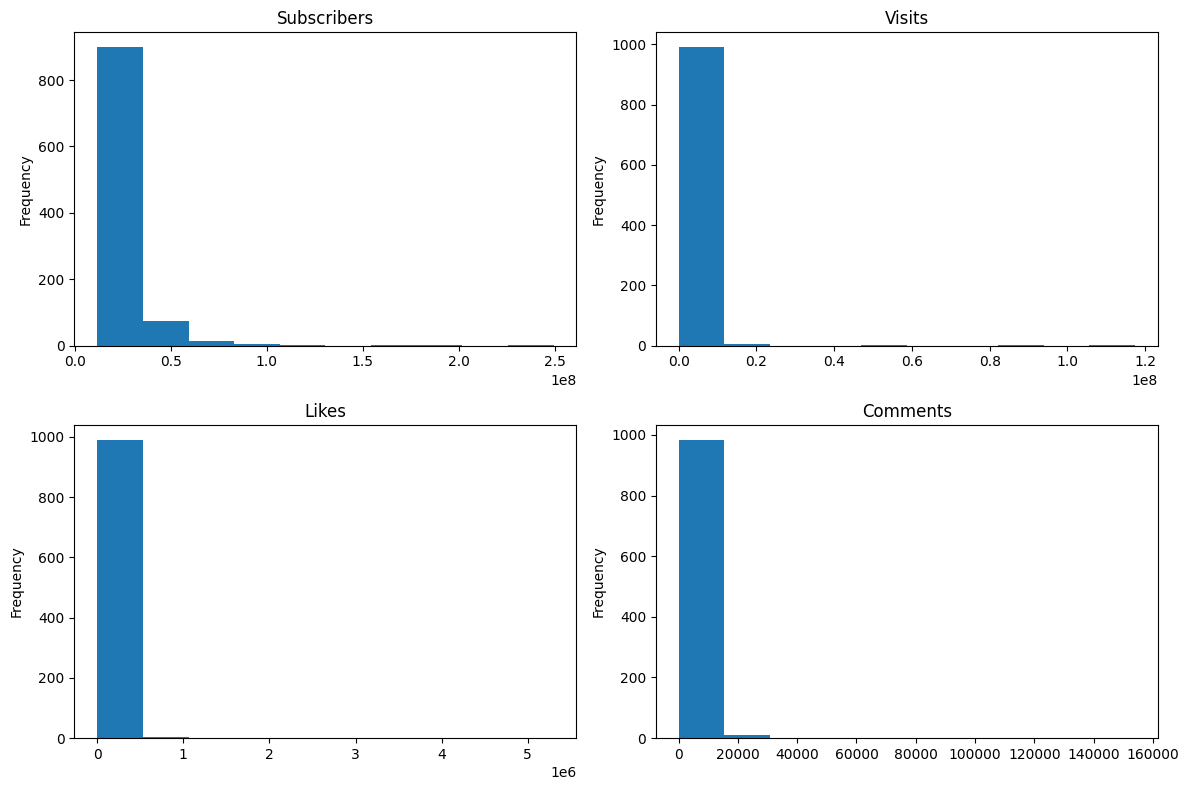

In [18]:
import matplotlib.pyplot as plt

# Set up subplots for the histograms
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot histograms for Subscribers, Visits, Likes, and Comments
df['Suscribers'].plot(kind='hist', ax=axes[0, 0], title='Subscribers')
df['Visits'].plot(kind='hist', ax=axes[0, 1], title='Visits')
df['Likes'].plot(kind='hist', ax=axes[1, 0], title='Likes')
df['Comments'].plot(kind='hist', ax=axes[1, 1], title='Comments')

plt.tight_layout()
plt.show()

**Trend Analysis**

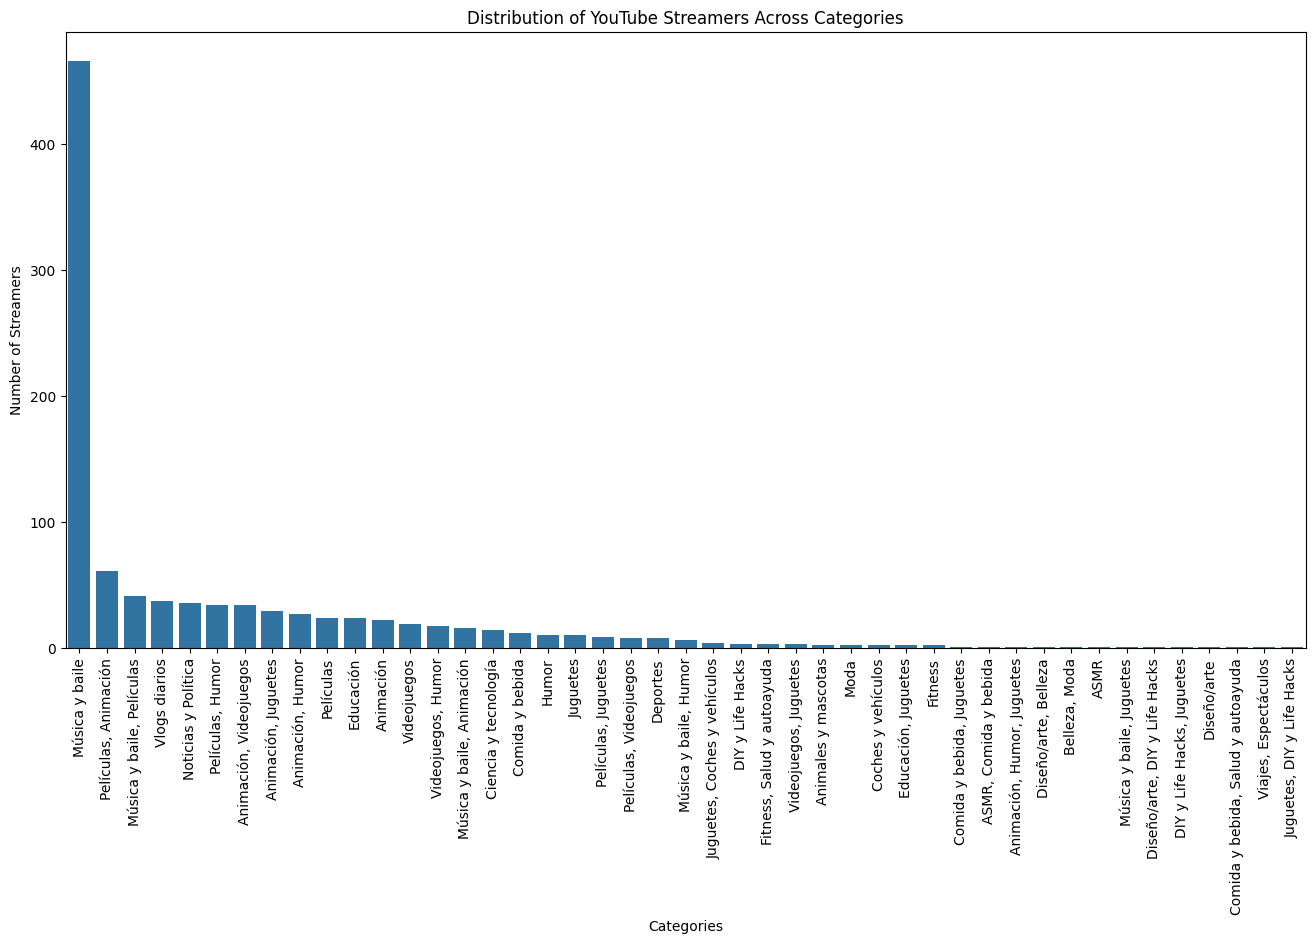

In [20]:
#Explore category trends using a bar chart
plt.figure(figsize=(16, 8))
sns.countplot(x='Categories', data=df, order=df['Categories'].value_counts().index)
plt.title('Distribution of YouTube Streamers Across Categories')
plt.xlabel('Categories')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=90)
plt.show()

**Audience Study**

*Analyze the distribution of streamers' audiences by country*

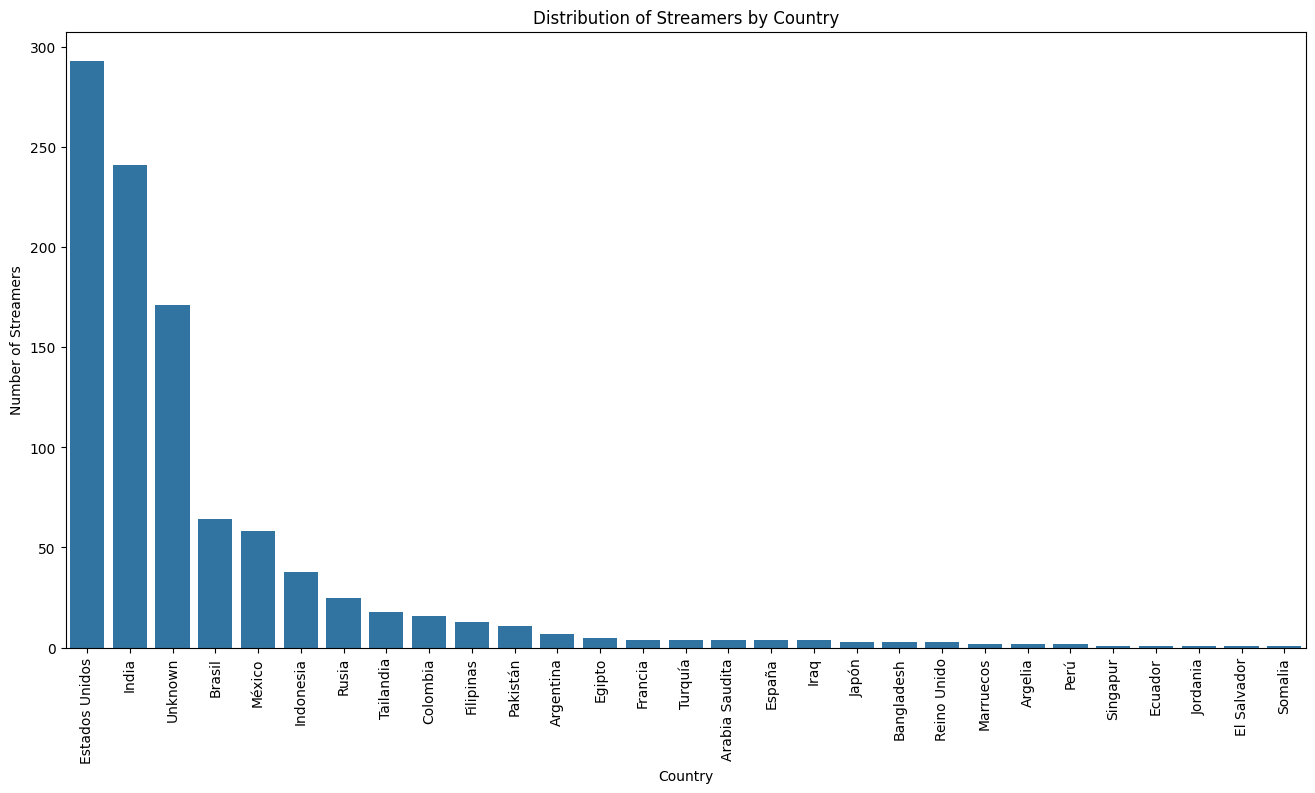

In [21]:
# Create a bar chart for the distribution of streamers by country
plt.figure(figsize=(16, 8))
sns.countplot(x='Country', data=df, order=df['Country'].value_counts().index)
plt.title('Distribution of Streamers by Country')
plt.xlabel('Country')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=90)
plt.show()

*Analyze regional preferences for specific content categories*

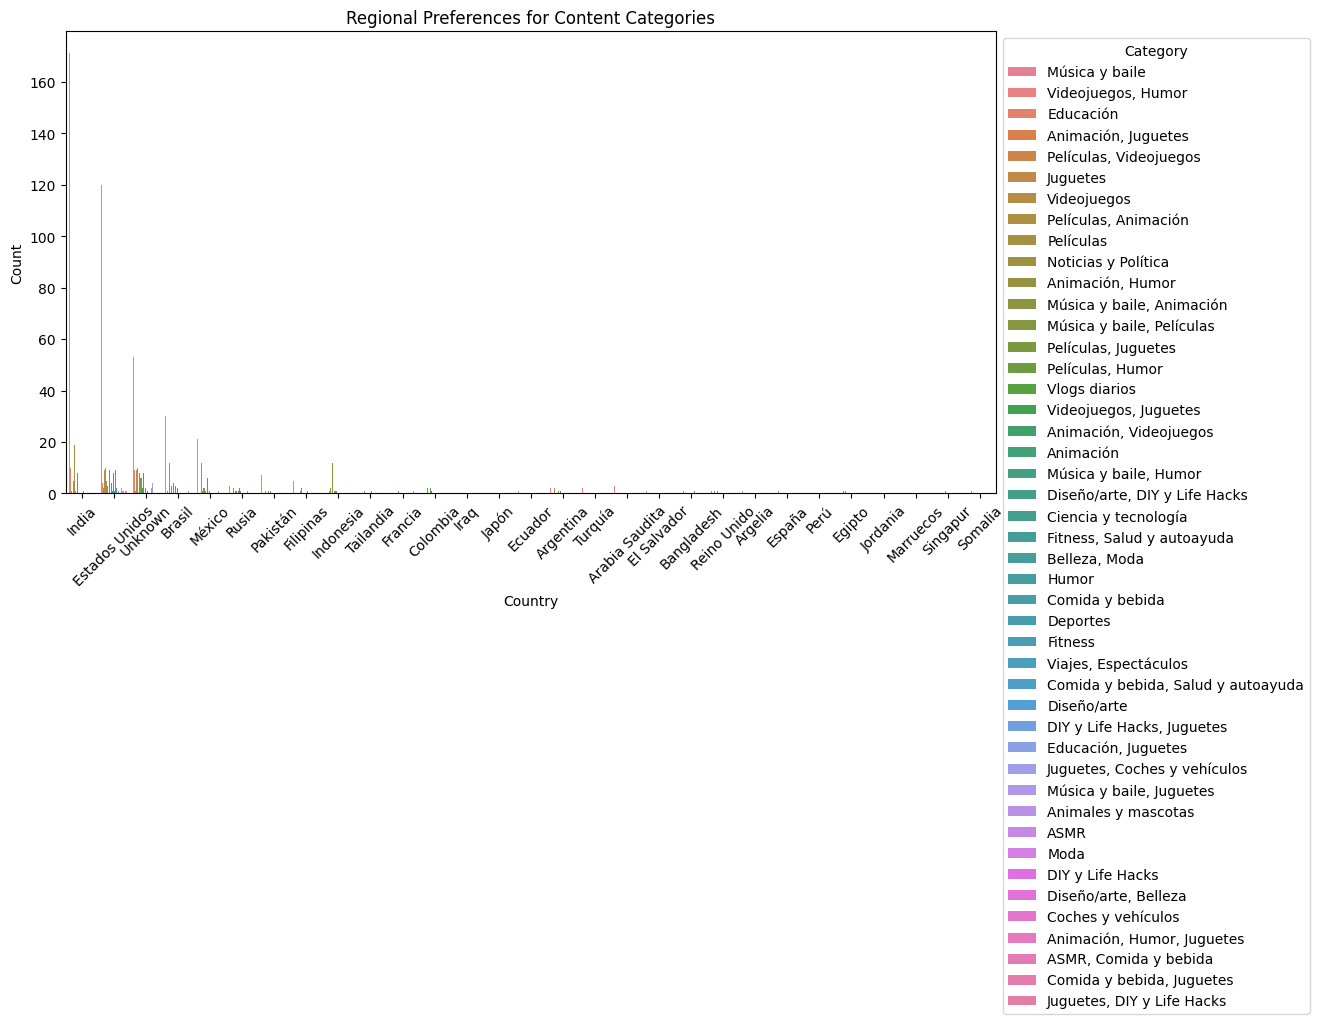

In [32]:
# Analyze regional preferences for specific content categories
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Country', hue='Categories')
plt.title('Regional Preferences for Content Categories')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1, 1))
plt.show()

**Performance Metrics**

In [23]:
# Calculate average values for each metric
average_metrics = df[['Suscribers', 'Visits', 'Likes', 'Comments']].mean()


In [24]:
# Display the calculated average values
print("Average Number of Subscribers: {:.2f}".format(average_metrics['Suscribers']))
print("Average Number of Visits: {:.2f}".format(average_metrics['Visits']))
print("Average Number of Likes: {:.2f}".format(average_metrics['Likes']))
print("Average Number of Comments: {:.2f}".format(average_metrics['Comments']))

Average Number of Subscribers: 21894400.00
Average Number of Visits: 1209446.32
Average Number of Likes: 53632.59
Average Number of Comments: 1288.77


*Visualize average metrics*



<ipython-input-22-247116d42801>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_metrics.index, y=average_metrics.values, palette='viridis')


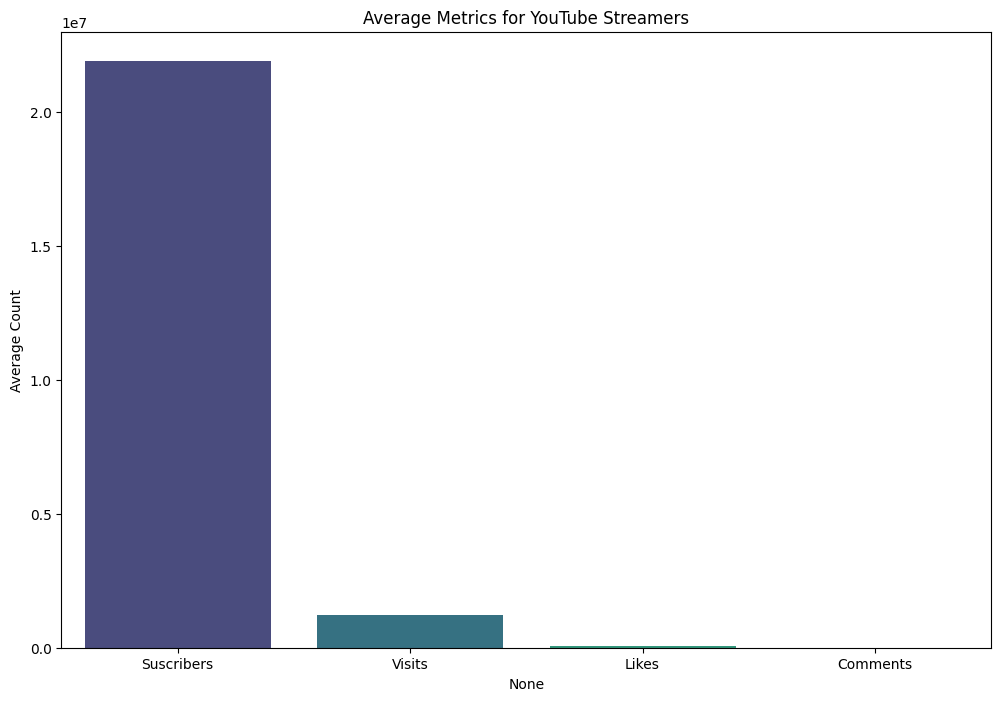

In [22]:
# Calculate average values
average_metrics = df[['Suscribers', 'Visits', 'Likes', 'Comments']].mean()

# Visualize the average metrics using a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=average_metrics.index, y=average_metrics.values, palette='viridis')
plt.title('Average Metrics for YouTube Streamers')
plt.ylabel('Average Count')
plt.show()

**Content Categories**

<ipython-input-26-419c072ef46b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Categories', data=df, palette='viridis', order=df['Categories'].value_counts().index)


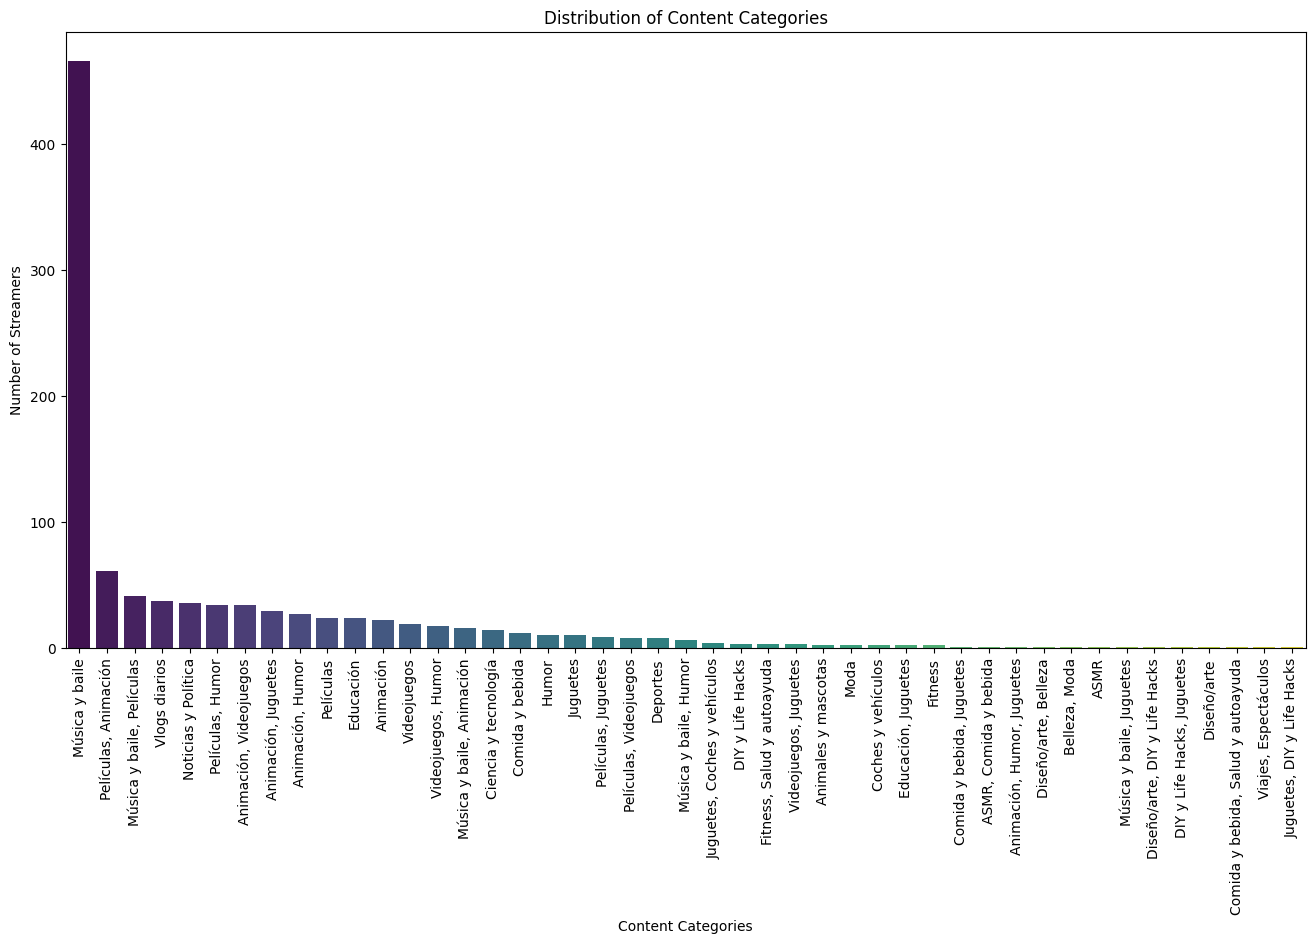

In [26]:
# Explore the distribution of content categories using a countplot
plt.figure(figsize=(16, 8))
sns.countplot(x='Categories', data=df, palette='viridis', order=df['Categories'].value_counts().index)
plt.title('Distribution of Content Categories')
plt.xlabel('Content Categories')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=90)
plt.show()

**Identify the categories with the highest number of streamers**

In [27]:
# Identify the categories with the highest number of streamers
top_categories = df['Categories'].value_counts().head(5)  # Adjust the number as needed
print("Top Categories with the Highest Number of Streamers:")
print(top_categories)

Top Categories with the Highest Number of Streamers:
Categories
Música y baile               466
Películas, Animación          61
Música y baile, Películas     41
Vlogs diarios                 37
Noticias y Política           36
Name: count, dtype: int64


**Brands and Collaborations**

<ipython-input-28-a0af17421697>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HighPerformance', data=df, palette='viridis')


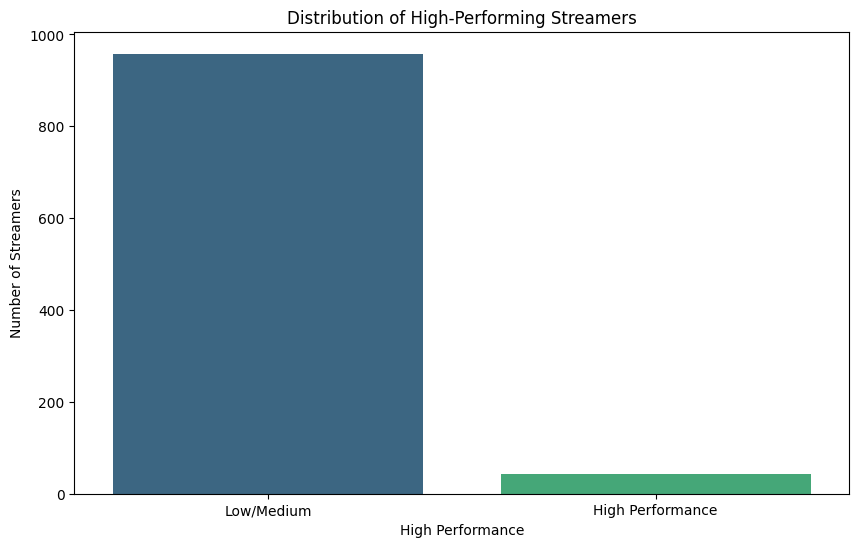

In [28]:
# Create a new column to categorize high-performing streamers based on a threshold
# You can adjust the threshold values based on your criteria
df['HighPerformance'] = ((df['Suscribers'] > df['Suscribers'].mean()) &
                        (df['Likes'] > df['Likes'].mean()) &
                        (df['Comments'] > df['Comments'].mean())).astype(int)

# Analyze the distribution of high-performing streamers
plt.figure(figsize=(10, 6))
sns.countplot(x='HighPerformance', data=df, palette='viridis')
plt.title('Distribution of High-Performing Streamers')
plt.xlabel('High Performance')
plt.ylabel('Number of Streamers')
plt.xticks([0, 1], ['Low/Medium', 'High Performance'])
plt.show()

**Benchmarking**

In [29]:
# Calculate average performance metrics
average_subscribers = df['Suscribers'].mean()
average_visits = df['Visits'].mean()
average_likes = df['Likes'].mean()
average_comments = df['Comments'].mean()

# Identify streamers with above-average performance
above_average_streamers = df[
    (df['Suscribers'] > average_subscribers) &
    (df['Visits'] > average_visits) &
    (df['Likes'] > average_likes) &
    (df['Comments'] > average_comments)
]

# Display the identified streamers
print("Streamers with Above-Average Performance:")
print(above_average_streamers[['Rank', 'Username', 'Suscribers', 'Visits', 'Likes', 'Comments']])

Streamers with Above-Average Performance:
     Rank               Username   Suscribers       Visits      Likes  \
1       2                MrBeast  183500000.0  117400000.0  5300000.0   
5       6              PewDiePie  111500000.0    2400000.0   197300.0   
26     27            dudeperfect   59700000.0    5300000.0   156500.0   
34     35            TaylorSwift   54100000.0    4300000.0   300400.0   
39     40            JuegaGerman   48600000.0    2000000.0   117100.0   
43     44               A4a4a4a4   47300000.0    9700000.0   330400.0   
58     59              Mikecrack   43400000.0    2200000.0   183400.0   
62     63         KimberlyLoaiza   42100000.0    5300000.0   271300.0   
64     65        luisitocomunica   41100000.0    2500000.0   128900.0   
70     71            JessNoLimit   39600000.0    1300000.0    73500.0   
96     97         TotalGaming093   36300000.0    1500000.0   129400.0   
98     99   TechnoGamerzOfficial   35600000.0    6200000.0   341800.0   
100   101

In [31]:
# Calculate a composite performance score (you can customize the formula)
df['PerformanceScore'] = df['Suscribers'] + df['Visits'] + df['Likes'] + df['Comments']

# Rank content creators based on the performance score
top_performing_creators = df.sort_values(by='PerformanceScore', ascending=False).head(10)

# Display the top-performing creators
print("Top 10 Performing Content Creators:")
print(top_performing_creators[['Rank', 'Username', 'PerformanceScore']])

Top 10 Performing Content Creators:
     Rank            Username  PerformanceScore
1       2             MrBeast       306218500.0
0       1             tseries       249588978.0
2       3           CoComelon       172524700.0
3       4            SETIndia       162615775.0
136   137            MrBeast2       119411600.0
4       5       KidsDianaShow       117412400.0
5       6           PewDiePie       114102200.0
6       7  LikeNastyaofficial       110128000.0
7       8         VladandNiki       105522100.0
8       9     zeemusiccompany        99776932.0
